In [5]:
# from oxksc.cbvc import cbv
import lightkurve as lk
import tarfile
import glob
import matplotlib.pyplot as plt
# import fitsio 
import numpy as np
from scipy.stats import skew

import utils
from astropy.timeseries import BoxLeastSquares, LombScargle
from scipy.optimize import curve_fit
from utils import amplitude_spectrum
# import batman

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
%run setup.py
plt.style.use('science')

<Figure size 252x189 with 0 Axes>

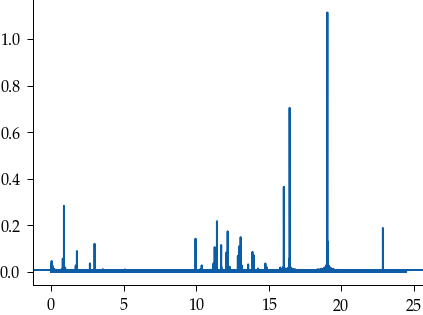

In [58]:
import glob
import numpy as np
# kplr009845898
file = glob.glob('../data/lc_pdc/*2695030.csv*')
time, flux, flux_err = np.loadtxt(file[0]).T
flux -= 1
flux *= 1e3
time = np.ascontiguousarray(time)
f,a = amplitude_spectrum(time, flux)
plt.plot(f,a)
plt.axhline(1 * np.nanstd(a))
# plt.ylim(0,0.00025)

In [8]:
from balmung import Balmung

bm = Balmung(time, flux)
bm.prewhiten(fmin=1, maxiter=100)

100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


In [36]:
import seaborn as sns

ccs = sns.color_palette("Reds", len(bm.removed))[::-1]

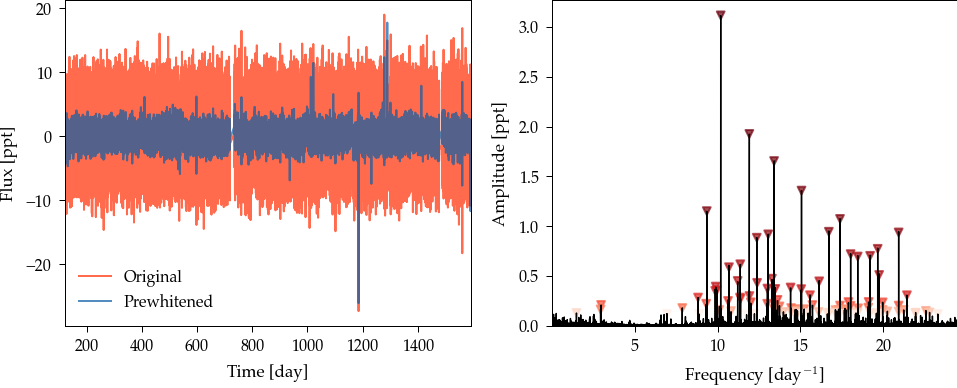

In [59]:
fig, axes = plt.subplots(1,2, figsize=[8, 3])
ax = axes[0]
ax.plot(bm.time, bm.flux, c='C3', alpha=0.7, label='Original')
ax.plot(bm.time, bm.residual, c='C0', alpha=0.7, label='Prewhitened')
ax.set(xlim=[bm.time[0], bm.time[-1]], xlabel='Time [day]', ylabel='Flux [ppt]')
ax.legend(fontsize=8)

ax = axes[1]
f,a = amplitude_spectrum(bm.time, bm.flux)
ax.plot(f,a, 'k', lw=0.7)
ax.scatter(np.array(bm.removed)[:,0], np.array(bm.removed)[:,1], marker='v', color=ccs, alpha=0.7, s=15)
ax.set(xlim=(f[0], f[-1]), ylim=(0, None), xlabel=r'Frequency [day$^{-1}$]', ylabel='Amplitude [ppt]')

plt.savefig(overleaf_path + 'prewhiten.pdf')

In [43]:
t = np.array(bm.removed)

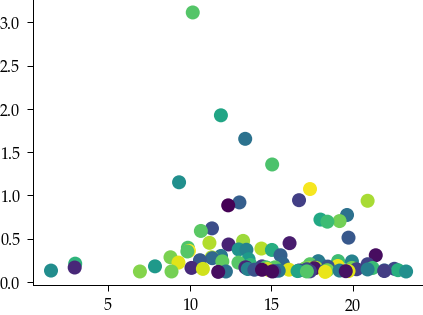

In [50]:
plt.scatter(t[:,0], t[:,1], marker='o', c=t[:,2])